# Project 2

* Import Libraries

In [2]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

* Read data file, parse dates

In [3]:
#read file
path = "dataset/house_sale_prediction.csv"
df_house_sales = pd.read_csv(path,index_col='id', parse_dates=True)

* Take a look at column types

In [4]:
df_house_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21613 entries, 7129300520 to 1523300157
Data columns (total 20 columns):
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(14), object(1)
memory usage: 3.5+ MB


* Preview data

In [5]:
df_house_sales.head(3)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062


* Drop unnecessary columns (inplace) : id, yr_renovated,sqft_living15,sqft_lot15

In [6]:
#drop columns  yr_renovated,sqft_living15,sqft_lot15
df_house_sales.drop(columns=[ "yr_renovated","sqft_living15","sqft_lot15"],inplace = True)

* check if there are null values in any column

In [7]:
#Find missing values if any
df_house_sales.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
zipcode          0
lat              0
long             0
dtype: int64

* Describe data

In [8]:
#Describe data
df_house_sales.describe()


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,98077.939805,47.560053,-122.213896
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,53.505026,0.138564,0.140828
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,98001.000000,47.155900,-122.519000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,98033.000000,47.471000,-122.328000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,98065.000000,47.571800,-122.230000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,98118.000000,47.678000,-122.125000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,98199.000000,47.777600,-121.315000


* Set bedrooms and zipcode as int64

In [9]:
#set datatypes
df_house_sales["zipcode"]  = df_house_sales["zipcode"].astype("int64")
df_house_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21613 entries, 7129300520 to 1523300157
Data columns (total 17 columns):
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
dtypes: float64(5), int64(11), object(1)
memory usage: 3.0+ MB


In [10]:
df_house_sales['view'].unique()

array([0, 3, 4, 2, 1])

In [11]:
df_house_sales['condition'].unique()

array([3, 5, 4, 1, 2])

In [12]:
df_house_sales['waterfront'].unique()
df_house_sales['waterfront'].value_counts()

0    21450
1      163
Name: waterfront, dtype: int64

# Visualization

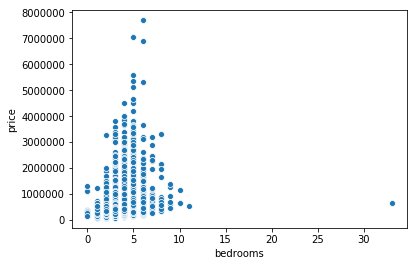

In [38]:
#scatter plot Number of bedrooms vs price
sns.scatterplot(data=df_house_sales,x="bedrooms",y="price")


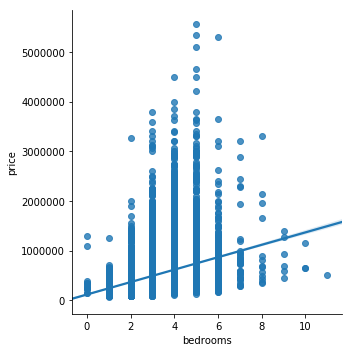

In [41]:
#Now do lmplot -- data filtered

filtered_data = (df_house_sales['bedrooms']<15) & (df_house_sales['price']<6000000)
sns.lmplot(data=df_house_sales[filtered_data],x="bedrooms",y="price")

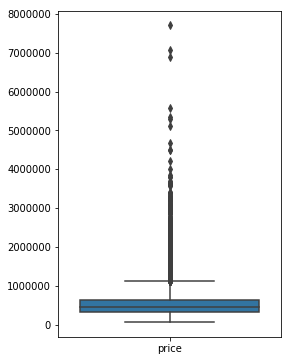

In [15]:
#Box plot for select characteristic
plt.subplots(figsize=(4,6))
sns.boxplot(data=df_house_sales[['price']])

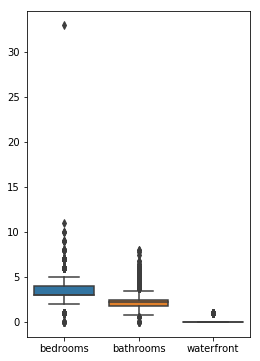

In [16]:
plt.subplots(figsize=(4,6))
sns.boxplot(data=df_house_sales[["bedrooms","bathrooms","waterfront"]])

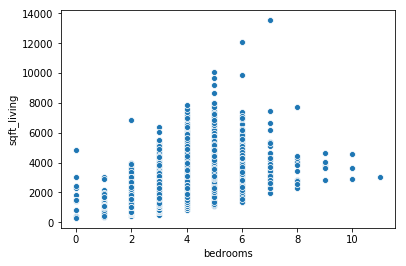

In [17]:
sns.scatterplot(data=df_house_sales[df_house_sales['bedrooms']<15],x="bedrooms",y="sqft_living")

# Remove outliers
* Standard deviation method

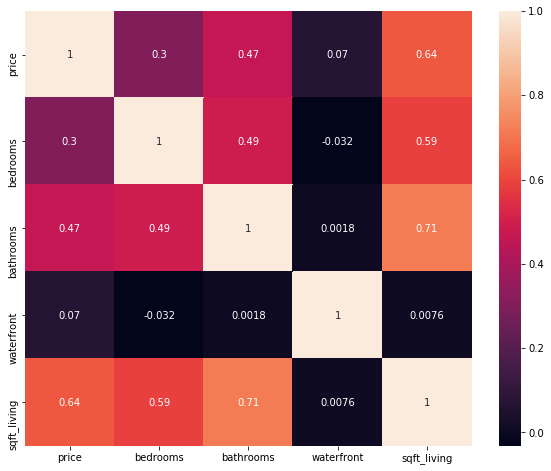

In [42]:
#by standard deviation method
mean_bedrooms = df_house_sales["bedrooms"].mean()
stdev_bedrooms = df_house_sales["bedrooms"].std()
top_range = mean_bedrooms + 1.95 * stdev_bedrooms
bottom_range = mean_bedrooms - 1.95 * stdev_bedrooms

mean_price = df_house_sales["price"].mean()
stdev_price = df_house_sales["price"].std()
top_range_price = mean_price +  stdev_price * 1.95
bottom_range_price = mean_price - stdev_price * 1.95

temp_df = df_house_sales[["price","bedrooms","bathrooms","waterfront","sqft_living"]].copy()

temp_df = temp_df.drop(temp_df[temp_df["bedrooms"] > top_range ].index)
temp_df = temp_df.drop(temp_df[temp_df["bedrooms"] < bottom_range ].index)

temp_df = temp_df.drop(temp_df[temp_df["price"] > top_range_price ].index)
# temp_df[temp_df["price"] < bottom_range_price]
temp_df = temp_df.drop(temp_df[temp_df["price"] < bottom_range_price ].index)
corr = temp_df.corr()


plt.subplots(figsize=(10,8))
sns.heatmap(corr,  annot=True)



* Inter quartile method

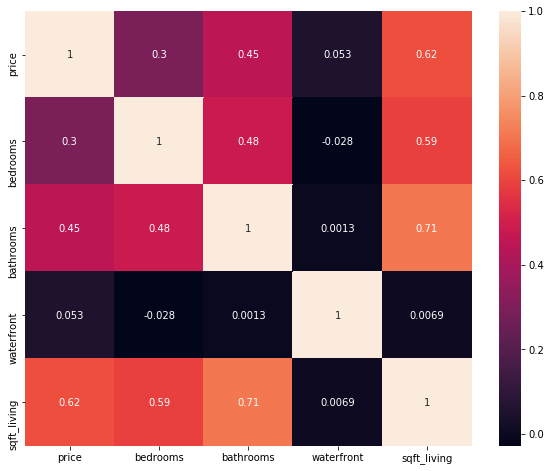

In [43]:
q1 = df_house_sales["bedrooms"].quantile(0.25)
q3 = df_house_sales["bedrooms"].quantile(0.75)
iqr = q3-q1

q1_price = df_house_sales["price"].quantile(0.25)
q3_price = df_house_sales["price"].quantile(0.75)
iqr_price = q3_price-q1_price

toprange = q3 + iqr * 1.5
botrange = q1 - iqr * 1.5

temp_df2 = df_house_sales[["price","bedrooms","bathrooms","waterfront","sqft_living"]].copy()
temp_df2 = temp_df2.drop(temp_df2[temp_df2['bedrooms'] > toprange].index)
temp_df2 = temp_df2.drop(temp_df2[temp_df2['bedrooms'] < botrange].index)

toprange_price = q3_price + iqr_price * 1.5
botrange_price = q1_price - iqr_price * 1.5


temp_df2 = temp_df2.drop(temp_df2[temp_df2['price'] > toprange_price].index)
temp_df2 = temp_df2.drop(temp_df2[temp_df2['price'] < botrange_price].index)

temp_df2.describe()

plt.subplots(figsize=(10,8))
corr2 = temp_df2.corr()
sns.heatmap(corr2,  annot=True)

# Observations
* Prices of the houses tend to increase more for increased number of bathrooms than increased bedrooms
* Increase in sqft_living (obviously) increased house prices
* waterfont does not show a favorable correlation with other characteristics
